In [1]:
library(tidyverse)
library(lme4)
library(lmerTest)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'Matrix'

The fo

In [44]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/ripple_modulation/post_processed/df_prop.csv')

data$groupup = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

summary(data)

       X                           session        rat         group     area   
 Min.   : 0.0   LEM3124_S20190307163732: 2   LEM3124:28   control:33   ca1:27  
 1st Qu.:23.5   LEM3124_S20190309145324: 2   LEM3216:21   pae    :62   ca3:68  
 Median :47.0   LEM3124_S20190315160017: 2   LEM3246:17                        
 Mean   :47.0   LEM3124_S20190319154019: 2   LEM3206:15                        
 3rd Qu.:70.5   LEM3124_S20190322123145: 2   LEM3116: 9                        
 Max.   :94.0   LEM3124_S20190325164111: 2   LEM3120: 2                        
                (Other)                :83   (Other): 3                        
    prop_pyr         prop_int          n_pyr           n_int          groupup  
 Min.   :0.0000   Min.   :0.0000   Min.   : 1.00   Min.   : 0.00   control:33  
 1st Qu.:0.1534   1st Qu.:0.0000   1st Qu.:17.00   1st Qu.: 3.50   pae    :62  
 Median :0.2857   Median :0.1500   Median :29.00   Median :15.00               
 Mean   :0.3578   Mean   :0.2519   Mean 

In [33]:
xtabs(~group+rat+area,data=data)

, , area = ca1

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS19 LS23
  control       2       1       0       0       5       0    0    1
  pae           0       0      16       0       0       0    2    0

, , area = ca3

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS19 LS23
  control       7       1       0       0      16       0    0    0
  pae           0       0      12      15       0      17    0    0


In [ ]:
data

In [74]:
# hist(data[data$area=='ca1',]$n_pyr_pass / data[data$area=='ca1',]$n_pyr)

# data[data$area=='ca1',]$n_pyr_pass / data[data$area=='ca1',]$n_pyr
data$prop_pyr = data$n_pyr_pass / data$n_pyr
# data$prop_pyr[is.nan(data$prop_pyr)] = 0


data$prop_int = data$n_int_pass / data$n_int
# data$prop_int[is.nan(data$prop_int)] = 0

# data$prop_pyr_log = log(data$prop_pyr)

# hist(data$prop_pyr)
# hist(data$prop_pyr_log)
# data$prop_pyr == 

# data$prop_pyr_log[is.nan(data$prop_pyr_log)] = 0
# data$prop_pyr_log[is.infinite(data$prop_pyr_log)] = 0




# CA1 pyramidal cells

In [34]:
overdisp.glmer <- function(model) {
  ## From http://glmm.wikidot.com/faq
  ## number of variance parameters in 
  ##   an n-by-n variance-covariance matrix
  vpars <- function(m) {
    nrow(m)*(nrow(m)+1)/2
  }
  model.df <- sum(sapply(lme4::VarCorr(model),vpars))+length(lme4::fixef(model))
  rdf <- nrow(model.frame(model))-model.df
  rp <- residuals(model)
  dev <- sum(rp^2)
  prat <- dev/rdf
  cat(paste("Residual deviance: ",round(dev,3)," on ",rdf," degrees of freedom",
    " (ratio: ",round(prat,3),")\n",sep=""))
}

[1] 0.6907731

[1] 0.2241814

boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,145.7662,149.6537,-69.88309,139.7662,NA,NA,NA
m1,4,141.5328,146.7161,-66.76638,133.5328,6.233417,1,0.01253616


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_pyr ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]
Weights: n_pyr

     AIC      BIC   logLik deviance df.resid 
   141.5    146.7    -66.8    133.5       23 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.24074 -0.49123  0.09777  0.23566  1.63176 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.8634   0.9292  
 rat         (Intercept) 0.0000   0.0000  
Number of obs: 27, groups:  session:rat, 27; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.5510     0.3437   1.603    0.109    
grouppae     -2.1579     0.4592  -4.699 2.61e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.737
optimizer (Nelder_Mead) convergence code: 0 (OK)
boundary (singular) fit

Residual deviance: 13.417 on 23 degrees of freedom (ratio: 0.583)


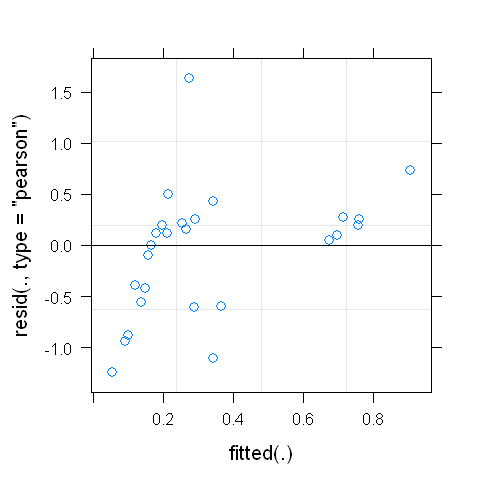

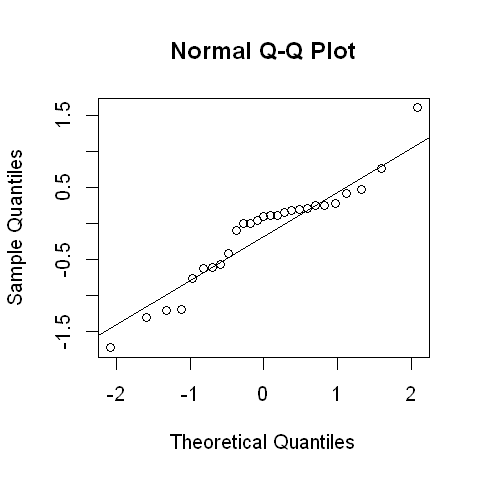

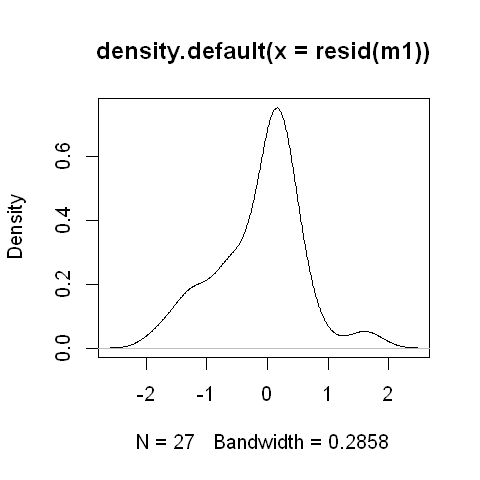

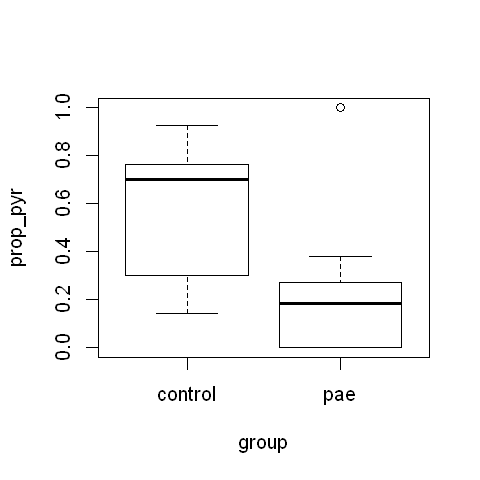

In [45]:
weighted.mean(data[data$area=='ca1' & data$group=='control',]$prop_pyr,data[data$area=='ca1' & data$group=='control',]$n_pyr)
weighted.mean(data[data$area=='ca1' & data$group=='pae',]$prop_pyr,data[data$area=='ca1' & data$group=='pae',]$n_pyr)

m1 = glmer(prop_pyr ~ group + (1|rat/session), weights=n_pyr, data=data[data$area=='ca1',],family="binomial")
m1.null = glmer(prop_pyr ~ 1 + (1|rat/session), weights=n_pyr, data=data[data$area=='ca1',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_pyr ~ group, data = data[data$area == "ca1",])



# CA1 interneurons

[1] 0.3862069

[1] 0.1837838

boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,96.86555,100.75306,-45.43278,90.86555,NA,NA,NA
m1,4,92.10083,97.28418,-42.05042,84.10083,6.764717,1,0.009297769


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_int ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]
Weights: n_int

     AIC      BIC   logLik deviance df.resid 
    92.1     97.3    -42.1     84.1       23 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9224 -0.4537 -0.0079  0.2308  0.9781 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 1.281    1.132   
 rat         (Intercept) 0.000    0.000   
Number of obs: 27, groups:  session:rat, 27; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -0.5822     0.4866  -1.196  0.23158   
grouppae     -1.8065     0.6803  -2.655  0.00792 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.698
optimizer (Nelder_Mead) convergence code: 0 (OK)
boundary (singular) fit: see ?isSing

Residual deviance: 11.014 on 23 degrees of freedom (ratio: 0.479)


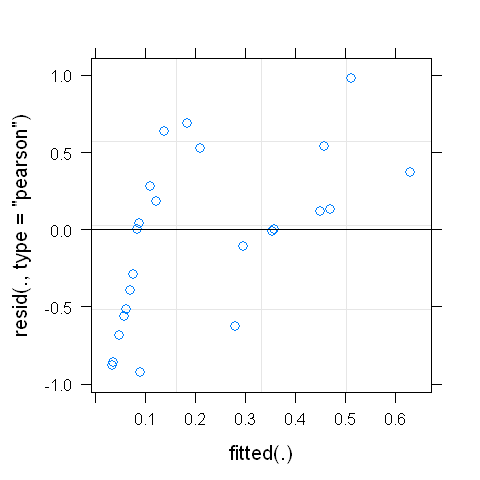

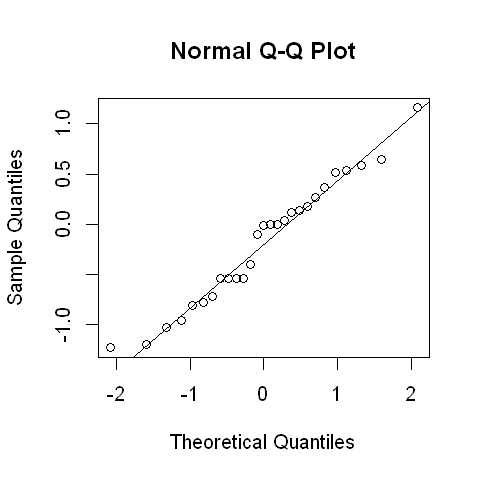

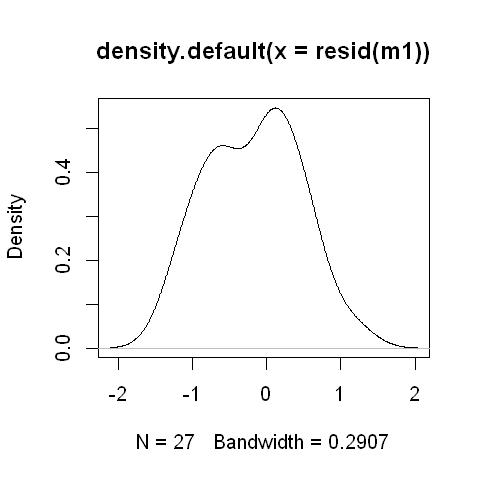

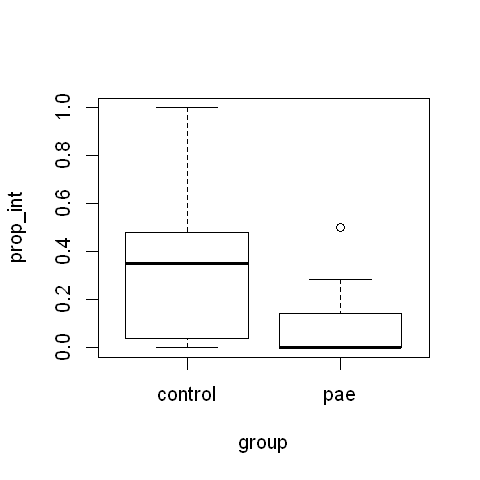

In [46]:
weighted.mean(data[data$area=='ca1' & data$group=='control',]$prop_int,data[data$area=='ca1' & data$group=='control',]$n_int)
weighted.mean(data[data$area=='ca1' & data$group=='pae',]$prop_int,data[data$area=='ca1' & data$group=='pae',]$n_int)

m1 = glmer(prop_int ~ group + (1|rat/session), weights=n_int, data=data[data$area=='ca1',], family="binomial")
m1.null = glmer(prop_int ~ 1 + (1|rat/session), weights=n_int, data=data[data$area=='ca1',], family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_int ~ group, data = data[data$area == "ca1",])


# CA3 pyramidal cells

[1] 0.5399504

[1] 0.2724589

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,401.6920,408.3505,-197.8460,395.6920,NA,NA,NA
m1,4,402.4146,411.2926,-197.2073,394.4146,1.27737,1,0.2583886


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_pyr ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]
Weights: n_pyr

     AIC      BIC   logLik deviance df.resid 
   402.4    411.3   -197.2    394.4       64 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.21858 -0.39409 -0.08787  0.29411  1.53186 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.4558   0.6751  
 rat         (Intercept) 0.8945   0.9458  
Number of obs: 68, groups:  session:rat, 68; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.3612     0.6033  -0.599    0.549
grouppae     -0.9905     0.8244  -1.202    0.230

Correlation of Fixed Effects:
         (Intr)
grouppae -0.731

Residual deviance: 23.596 on 64 degrees of freedom (ratio: 0.369)


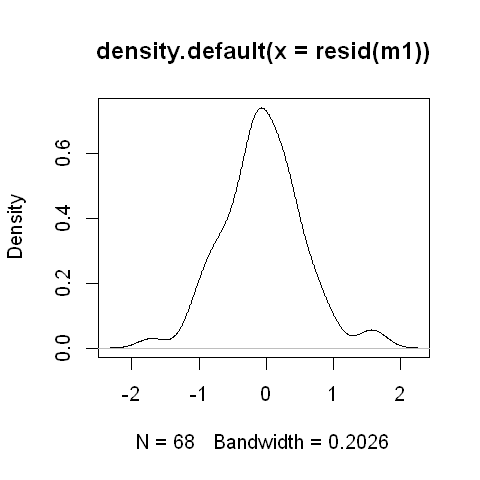

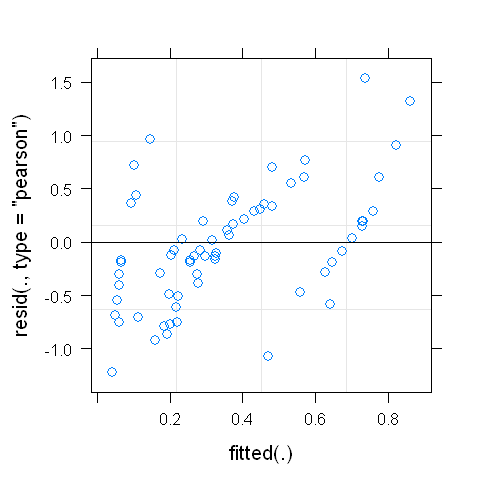

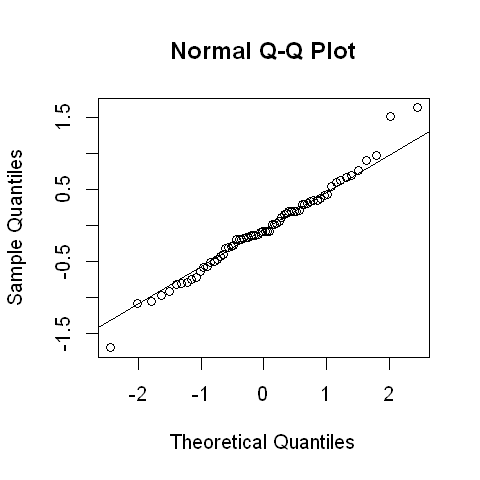

In [38]:
weighted.mean(data[data$area=='ca3' & data$group=='control',]$prop_pyr)
weighted.mean(data[data$area=='ca3' & data$group=='pae',]$prop_pyr)

m1 = glmer(prop_pyr ~ group + (1|rat/session), weights=n_pyr, data=data[data$area=='ca3',], family="binomial")
m1.null = glmer(prop_pyr ~ 1 + (1|rat/session), weights=n_pyr, data=data[data$area=='ca3',], family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

plot(density(resid(m1)))

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))

# CA3 interneurons

[1] 0.3381487

[1] 0.2466659

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,275.3336,281.9921,-134.6668,269.3336,NA,NA,NA
m1,4,277.3113,286.1894,-134.6557,269.3113,0.02224343,1,0.8814413


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_int ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]
Weights: n_int

     AIC      BIC   logLik deviance df.resid 
   277.3    286.2   -134.7    269.3       64 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.18915 -0.46472 -0.05482  0.40752  1.14306 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.5333   0.7303  
 rat         (Intercept) 1.3035   1.1417  
Number of obs: 68, groups:  session:rat, 68; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -1.2941     0.7719  -1.677   0.0936 .
grouppae     -0.1551     1.0263  -0.151   0.8799  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.751

Residual deviance: 35.601 on 64 degrees of freedom (ratio: 0.556)


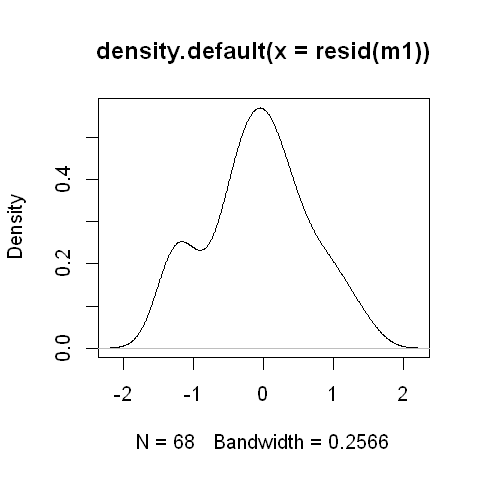

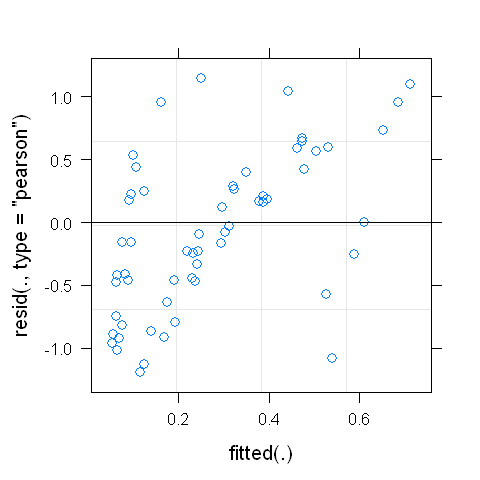

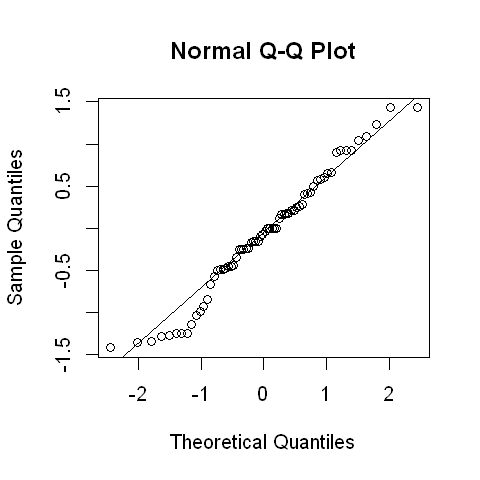

In [39]:
weighted.mean(data[data$area=='ca3' & data$group=='control',]$prop_int)
weighted.mean(data[data$area=='ca3' & data$group=='pae',]$prop_int)

m1 = glmer(prop_int ~ group + (1|rat/session), weights=n_int, data=data[data$area=='ca3',], family="binomial")
m1.null = glmer(prop_int ~ 1 + (1|rat/session), weights=n_int, data=data[data$area=='ca3',], family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

plot(density(resid(m1)))

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))

# pyramidal cell interneuron cell count data

In [3]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/cell_recruitment/processed/df_prop.csv')
summary(data)

       X                             session         rat         group    
 Min.   :  0.00   LEM3124_S20190307132509:  2   LEM3124:37   control: 84  
 1st Qu.: 54.25   LEM3124_S20190307163732:  2   LEM3206:36   pae    :134  
 Median :108.50   LEM3124_S20190309145324:  2   LEM3116:30                
 Mean   :108.50   LEM3124_S20190311161641:  2   LEM3216:28                
 3rd Qu.:162.75   LEM3124_S20190315160017:  2   LEM3246:22                
 Max.   :217.00   LEM3124_S20190319154019:  2   LS19   :16                
                  (Other)                :206   (Other):49                
  area        prop_pyr         n_cells     
 ca1: 92   Min.   :0.0000   Min.   :  1.0  
 ca3:126   1st Qu.:0.5000   1st Qu.: 18.0  
           Median :0.6667   Median : 34.0  
           Mean   :0.6386   Mean   : 39.8  
           3rd Qu.:0.8000   3rd Qu.: 55.0  
           Max.   :1.0000   Max.   :138.0  
                                           

In [4]:
data$groupup = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

## compare prop of pyramidal cells 

don't need int prob because they are inversely proportial 

[1] 0.6934156

[1] 0.5819296

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,530.8457,538.4111,-262.4229,524.8457,NA,NA,NA
m1,4,529.8656,539.9527,-260.9328,521.8656,2.980126,1,0.08429269


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_pyr ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]
Weights: n_cells

     AIC      BIC   logLik deviance df.resid 
   529.9    540.0   -260.9    521.9       88 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.96140 -0.26382  0.03643  0.44800  1.31491 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.6034   0.7768  
 rat         (Intercept) 0.2512   0.5012  
Number of obs: 92, groups:  session:rat, 92; rat, 10

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.9906     0.2937   3.373 0.000744 ***
grouppae     -0.7587     0.4046  -1.875 0.060802 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.721

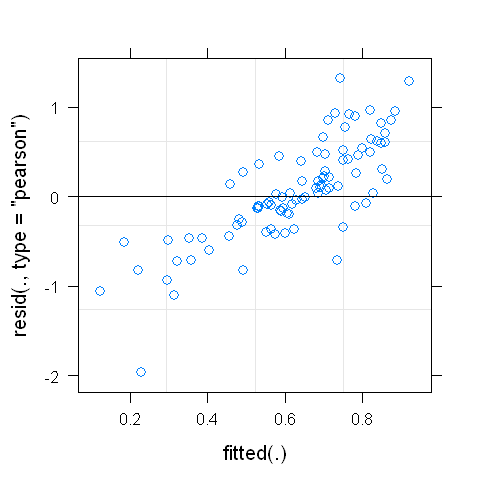

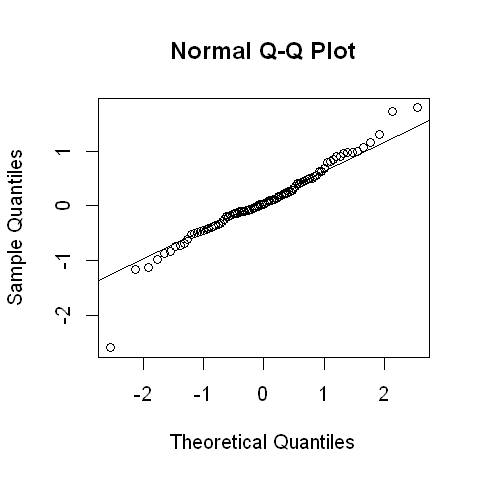

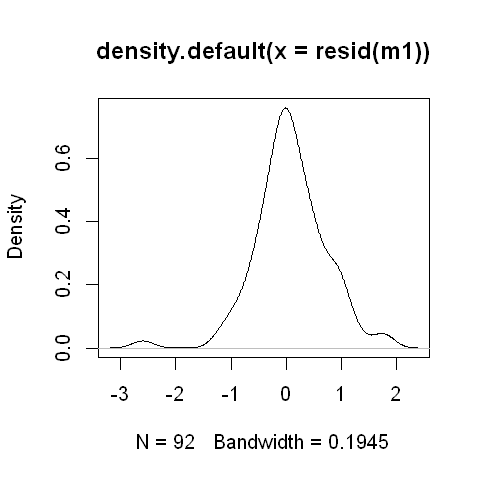

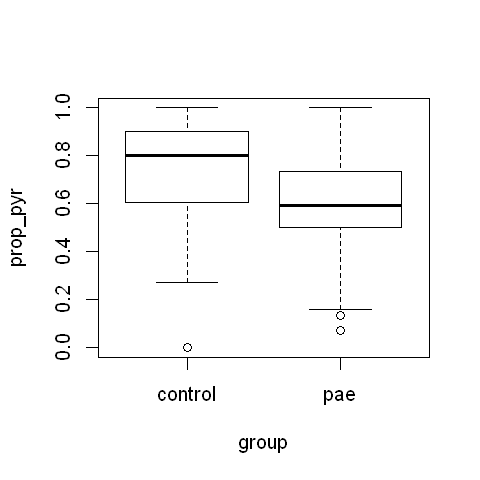

In [13]:
weighted.mean(data[data$area=='ca1' & data$group=='control',]$prop_pyr, data[data$area=='ca1' & data$group=='control',]$n_cells)
weighted.mean(data[data$area=='ca1' & data$group=='pae',]$prop_pyr, data[data$area=='ca1' & data$group=='pae',]$n_cells)

m1 = glmer(prop_pyr ~ group + (1|rat/session), weights=n_cells, data=data[data$area=='ca1',],family="binomial")
m1.null = glmer(prop_pyr ~ 1 + (1|rat/session), weights=n_cells, data=data[data$area=='ca1',],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_pyr ~ group, data = data[data$area == "ca1",])


[1] 0.7482993

[1] 0.6048934

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,835.3587,843.8675,-414.6793,829.3587,NA,NA,NA
m1,4,836.0393,847.3844,-414.0196,828.0393,1.319394,1,0.2507008


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_pyr ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]
Weights: n_cells

     AIC      BIC   logLik deviance df.resid 
   836.0    847.4   -414.0    828.0      122 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3594 -0.2201  0.0564  0.2281  1.2794 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.6452   0.8033  
 rat         (Intercept) 0.3704   0.6086  
Number of obs: 126, groups:  session:rat, 126; rat, 8

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   1.0039     0.3280   3.061   0.0022 **
grouppae     -0.6011     0.4929  -1.219   0.2227   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.666

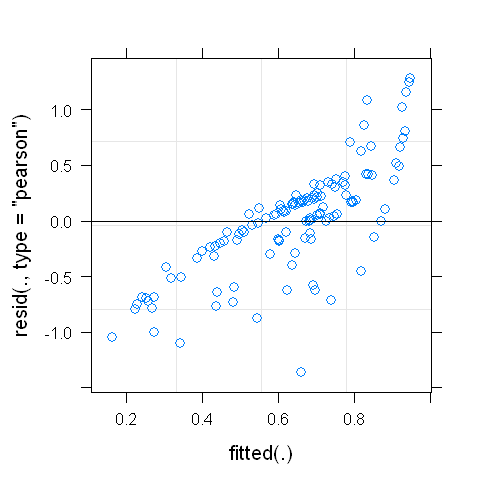

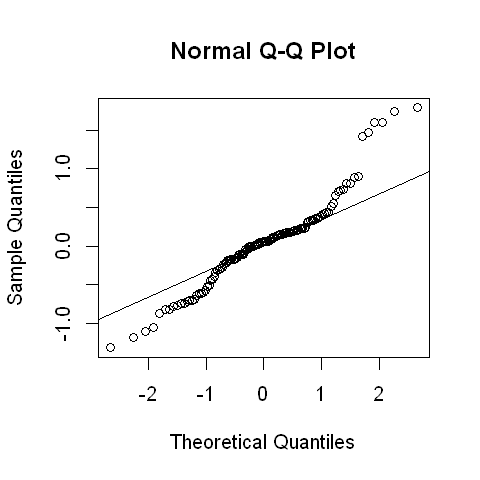

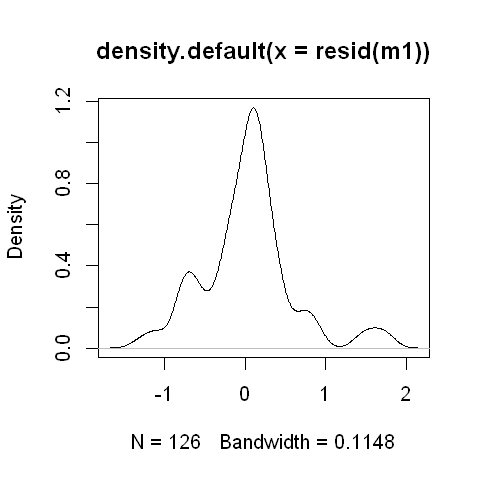

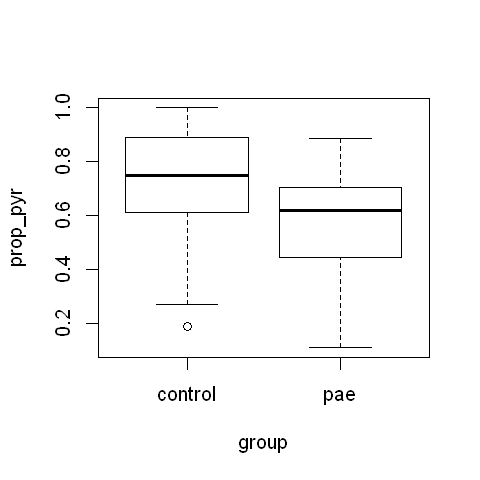

In [14]:
weighted.mean(data[data$area=='ca3' & data$group=='control',]$prop_pyr, data[data$area=='ca3' & data$group=='control',]$n_cells)
weighted.mean(data[data$area=='ca3' & data$group=='pae',]$prop_pyr, data[data$area=='ca3' & data$group=='pae',]$n_cells)

m1 = glmer(prop_pyr ~ group + (1|rat/session), weights=n_cells, data=data[data$area=='ca3',],family="binomial")
m1.null = glmer(prop_pyr ~ 1 + (1|rat/session), weights=n_cells, data=data[data$area=='ca3',],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_pyr ~ group, data = data[data$area == "ca3",])


# compare ripple phase modulation

In [55]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/ripple_modulation_phase/post_processed/df_prop.csv')
summary(data)

       X                           session        rat         group     area   
 Min.   : 0.0   LEM3124_S20190307163732: 2   LEM3124:28   control:33   ca1:27  
 1st Qu.:23.5   LEM3124_S20190309145324: 2   LEM3216:21   pae    :62   ca3:68  
 Median :47.0   LEM3124_S20190315160017: 2   LEM3246:17                        
 Mean   :47.0   LEM3124_S20190319154019: 2   LEM3206:15                        
 3rd Qu.:70.5   LEM3124_S20190322123145: 2   LEM3116: 9                        
 Max.   :94.0   LEM3124_S20190325164111: 2   LEM3120: 2                        
                (Other)                :83   (Other): 3                        
    prop_pyr          prop_int          n_pyr           n_int      
 Min.   :0.04545   Min.   :0.0000   Min.   : 1.00   Min.   : 0.00  
 1st Qu.:0.38315   1st Qu.:0.2500   1st Qu.:17.00   1st Qu.: 3.50  
 Median :0.55882   Median :0.5000   Median :29.00   Median :15.00  
 Mean   :0.52514   Mean   :0.4366   Mean   :33.87   Mean   :14.73  
 3rd Qu.:0.66667   3

In [56]:
data$groupup = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

[1] 0.3441397

[1] 0.4458438

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,147.5544,151.4419,-70.77720,141.5544,NA,NA,NA
m1,4,149.1826,154.3659,-70.59129,141.1826,0.3718204,1,0.5420137


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_pyr ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]
Weights: n_pyr

     AIC      BIC   logLik deviance df.resid 
   149.2    154.4    -70.6    141.2       23 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.06650 -0.19586  0.06813  0.37520  1.44294 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.3908   0.6252  
 rat         (Intercept) 0.2406   0.4905  
Number of obs: 27, groups:  session:rat, 27; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.2400     0.4233  -0.567    0.571
grouppae      0.3753     0.5837   0.643    0.520

Correlation of Fixed Effects:
         (Intr)
grouppae -0.665

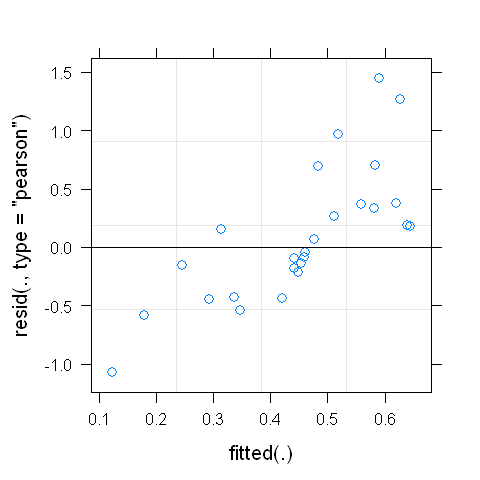

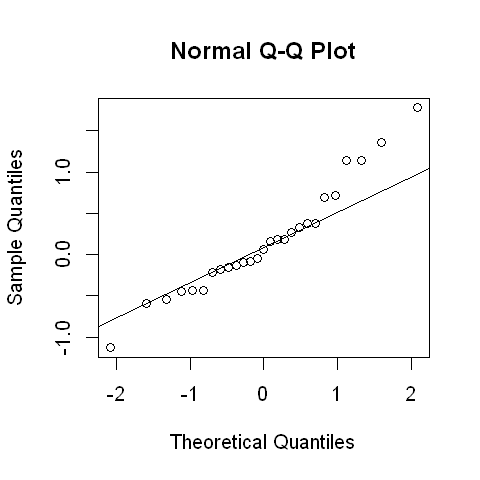

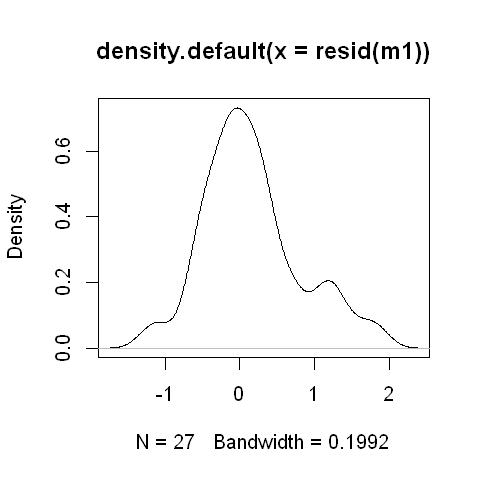

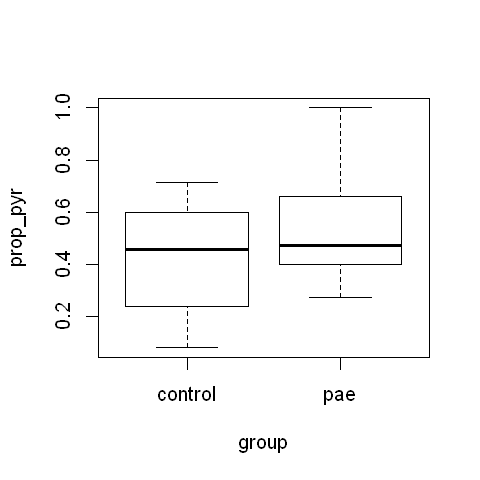

In [57]:
weighted.mean(data[data$area=='ca1' & data$group=='control',]$prop_pyr,data[data$area=='ca1' & data$group=='control',]$n_pyr)
weighted.mean(data[data$area=='ca1' & data$group=='pae',]$prop_pyr,data[data$area=='ca1' & data$group=='pae',]$n_pyr)

m1 = glmer(prop_pyr ~ group + (1|rat/session), weights=n_pyr, data=data[data$area=='ca1',],family="binomial")
m1.null = glmer(prop_pyr ~ 1 + (1|rat/session), weights=n_pyr, data=data[data$area=='ca1',],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_pyr ~ group, data = data[data$area == "ca1",])

[1] 0.1517241

[1] 0.4162162

boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,109.1867,113.0743,-51.59337,103.1867,NA,NA,NA
m1,4,104.5579,109.7413,-48.27895,96.5579,6.628842,1,0.01003404


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_int ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]
Weights: n_int

     AIC      BIC   logLik deviance df.resid 
   104.6    109.7    -48.3     96.6       23 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2590 -0.3719  0.0000  0.3581  2.0456 

Random effects:
 Groups      Name        Variance  Std.Dev. 
 session:rat (Intercept) 6.387e-01 7.992e-01
 rat         (Intercept) 3.519e-10 1.876e-05
Number of obs: 27, groups:  session:rat, 27; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.9468     0.4251   -4.58 4.65e-06 ***
grouppae      1.6541     0.5074    3.26  0.00111 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.832
optimizer (Nelder_Mead) convergence code: 0 (OK)
boundary (singular) fit: se

Residual deviance: 16.61 on 23 degrees of freedom (ratio: 0.722)


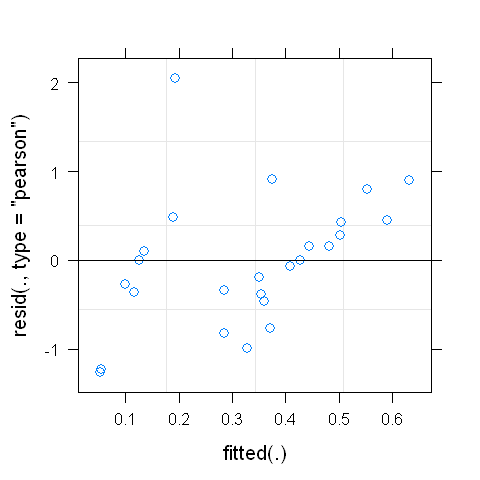

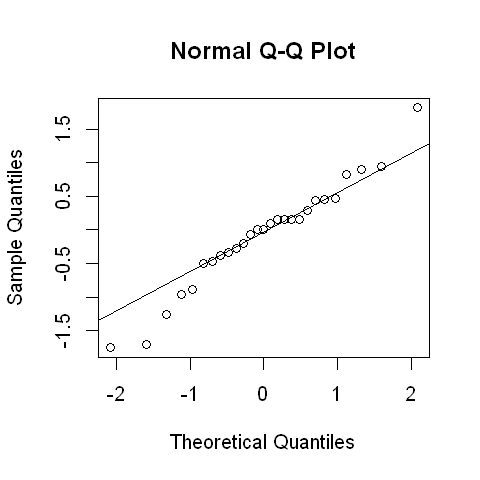

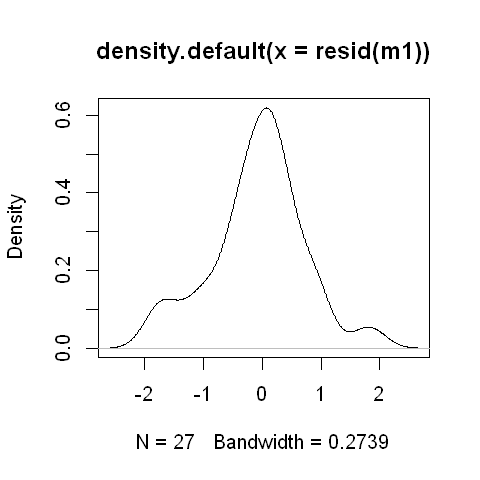

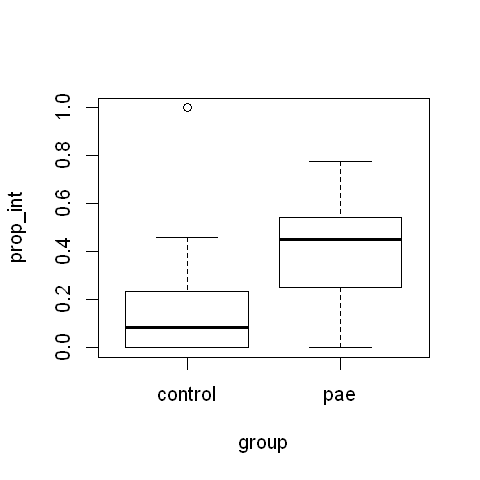

In [58]:
weighted.mean(data[data$area=='ca1' & data$group=='control',]$prop_int,data[data$area=='ca1' & data$group=='control',]$n_int)
weighted.mean(data[data$area=='ca1' & data$group=='pae',]$prop_int,data[data$area=='ca1' & data$group=='pae',]$n_int)

m1 = glmer(prop_int ~ group + (1|rat/session), weights=n_int, data=data[data$area=='ca1',],family="binomial")
m1.null = glmer(prop_int ~ 1 + (1|rat/session), weights=n_int, data=data[data$area=='ca1',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_int ~ group, data = data[data$area == "ca1",])

[1] 0.5388535

[1] 0.5626911

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,430.7095,437.3680,-212.3547,424.7095,NA,NA,NA
m1,4,432.7087,441.5867,-212.3544,424.7087,0.0007374594,1,0.9783351


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_pyr ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]
Weights: n_pyr

     AIC      BIC   logLik deviance df.resid 
   432.7    441.6   -212.4    424.7       64 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.64186 -0.25067  0.00546  0.32301  1.08536 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.4499   0.6708  
 rat         (Intercept) 0.1655   0.4068  
Number of obs: 68, groups:  session:rat, 68; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.13046    0.31163   0.419    0.675
grouppae     0.01106    0.40814   0.027    0.978

Correlation of Fixed Effects:
         (Intr)
grouppae -0.764

Residual deviance: 22.083 on 64 degrees of freedom (ratio: 0.345)


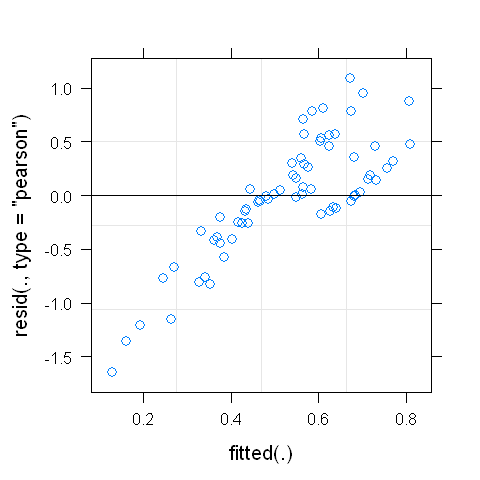

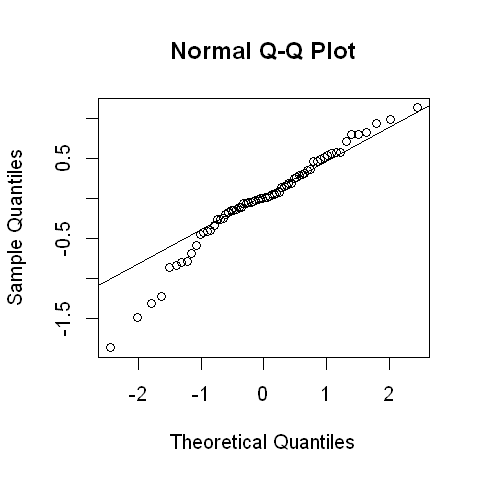

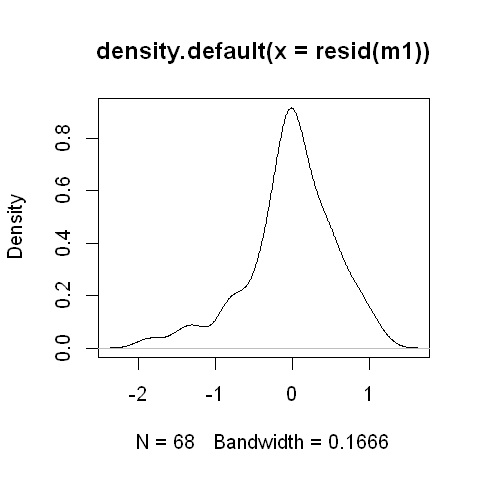

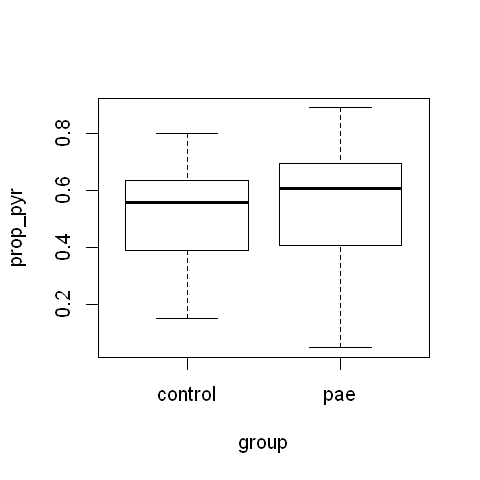

In [53]:
weighted.mean(data[data$area=='ca3' & data$group=='control',]$prop_pyr,data[data$area=='ca3' & data$group=='control',]$n_pyr)
weighted.mean(data[data$area=='ca3' & data$group=='pae',]$prop_pyr,data[data$area=='ca3' & data$group=='pae',]$n_pyr)

m1 = glmer(prop_pyr ~ group + (1|rat/session), weights=n_pyr, data=data[data$area=='ca3',],family="binomial")
m1.null = glmer(prop_pyr ~ 1 + (1|rat/session), weights=n_pyr, data=data[data$area=='ca3',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_pyr ~ group, data = data[data$area == "ca3",])


[1] 0.4571429

[1] 0.5123789

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,305.3481,312.0066,-149.674,299.3481,NA,NA,NA
m1,4,307.3300,316.2081,-149.665,299.3300,0.01804024,1,0.8931543


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_int ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]
Weights: n_int

     AIC      BIC   logLik deviance df.resid 
   307.3    316.2   -149.7    299.3       64 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0811 -0.2657  0.0802  0.4070  0.9411 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.42604  0.6527  
 rat         (Intercept) 0.05745  0.2397  
Number of obs: 68, groups:  session:rat, 68; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.07759    0.30746  -0.252    0.801
grouppae     0.04835    0.35962   0.134    0.893

Correlation of Fixed Effects:
         (Intr)
grouppae -0.856

Residual deviance: 30.677 on 64 degrees of freedom (ratio: 0.479)


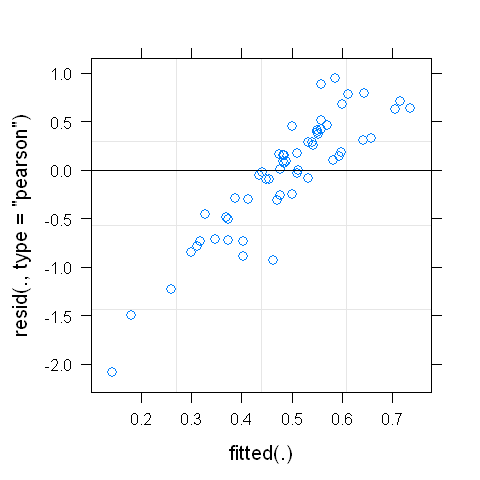

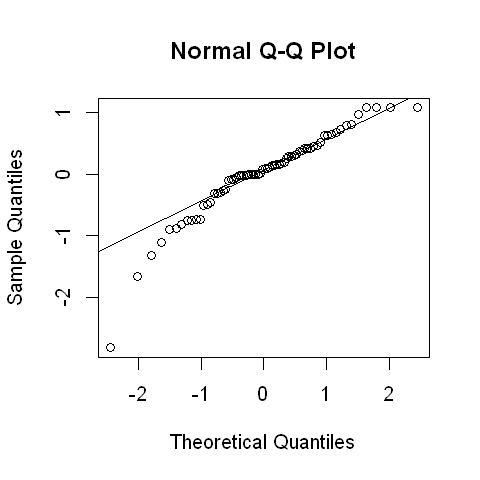

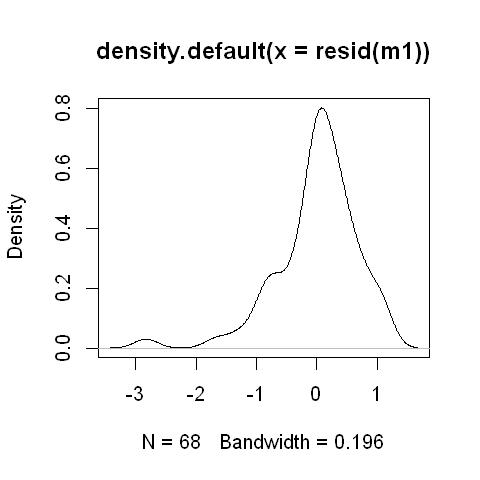

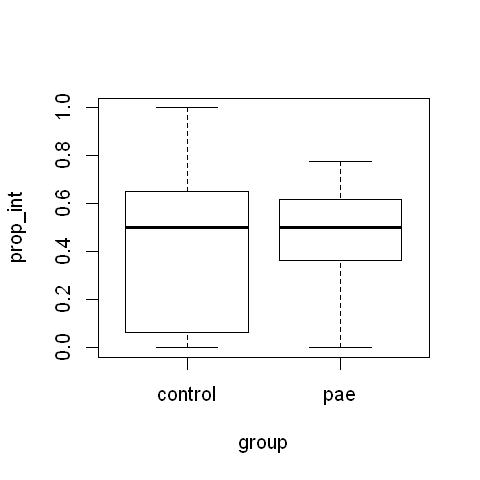

In [54]:
weighted.mean(data[data$area=='ca3' & data$group=='control',]$prop_int,data[data$area=='ca3' & data$group=='control',]$n_int)
weighted.mean(data[data$area=='ca3' & data$group=='pae',]$prop_int,data[data$area=='ca3' & data$group=='pae',]$n_int)

m1 = glmer(prop_int ~ group + (1|rat/session), weights=n_int, data=data[data$area=='ca3',],family="binomial")
m1.null = glmer(prop_int ~ 1 + (1|rat/session), weights=n_int, data=data[data$area=='ca3',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_int ~ group, data = data[data$area == "ca3",])